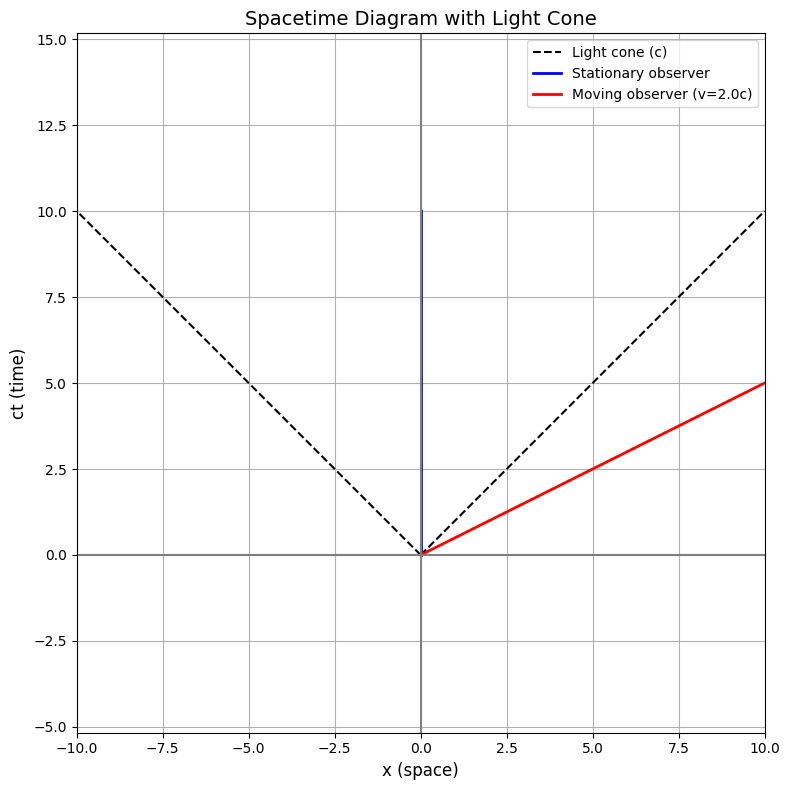

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
c = 1  # Speed of light (set to 1 for natural units)
v =  2 * c  # velocity of moving observer

# Time range
t = np.linspace(0, 10, 100)

# Light cone
x_light1 = c * t
x_light2 = -c * t

# Worldlines
x_stationary = np.zeros_like(t)         # Observer at x = 0
x_moving = v * t                        # Moving observer

# Plot
plt.figure(figsize=(8, 8))
plt.plot(x_light1, t, 'k--', label='Light cone (c)')
plt.plot(x_light2, t, 'k--')
plt.plot(x_stationary, t, 'b-', linewidth=2, label='Stationary observer')
plt.plot(x_moving, t, 'r-', linewidth=2, label=f'Moving observer (v={v:.1f}c)')

# Axes and labels
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.xlabel('x (space)', fontsize=12)
plt.ylabel('ct (time)', fontsize=12)
plt.title('Spacetime Diagram with Light Cone', fontsize=14)
plt.grid(True)
plt.legend()
plt.axis('equal')

plt.xlim(-10, 10)
plt.ylim(0, 10)
plt.tight_layout()
plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Natural units: c = 1
c = 1
event_x, event_ct = 3, 4  # Fixed spacetime event

# Setup figure
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-6, 6)
ax.set_ylim(-1, 8)
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('ct', fontsize=12)
ax.set_title('Lorentz Transformation: Rotating Axes + Event Transformation')
ax.grid(True)
ax.axhline(0, color='gray', lw=0.5)
ax.axvline(0, color='gray', lw=0.5)

# Plot the light cone
t_vals = np.linspace(0, 7, 100)
ax.plot(t_vals, t_vals, 'k--', lw=1)
ax.plot(-t_vals, t_vals, 'k--', lw=1)

# Plot stationary event
event_dot, = ax.plot(event_x, event_ct, 'ro', label='Event (x, ct)')
event_prime_dot, = ax.plot([], [], 'bo', label="Transformed Event (x', ct')")

# Add legends for fixed axes
stationary_x, = ax.plot([0, 1], [0, 0], 'k-', lw=2, label='x')
stationary_ct, = ax.plot([0, 0], [0, 1], 'k-', lw=2, label='ct')
moving_x, = ax.plot([], [], 'r-', lw=2, label="x'")
moving_ct, = ax.plot([], [], 'b-', lw=2, label="ct'")

ax.legend(loc='upper left')

# Lorentz transformation function
def lorentz_transform(x, ct, beta):
    gamma = 1 / np.sqrt(1 - beta**2)
    x_prime = gamma * (x - beta * ct)
    ct_prime = gamma * (ct - beta * x)
    return x_prime, ct_prime

# Animation update
def update(frame):
    beta = frame / 100  # from 0 to ~0.99
    if beta >= 0.99:
        beta = 0.99
    gamma = 1 / np.sqrt(1 - beta**2)

    # Axes in moving frame
    x_axis_x = np.array([0, 1])
    x_axis_ct = beta * x_axis_x
    ct_axis_ct = np.array([0, 1])
    ct_axis_x = beta * ct_axis_ct

    moving_x.set_data(x_axis_x, x_axis_ct)
    moving_ct.set_data(ct_axis_x, ct_axis_ct)


    # Transform the event
    xp, ctp = lorentz_transform(event_x, event_ct, beta)
    event_prime_dot.set_data([xp], [ctp])

    return moving_x, moving_ct, event_prime_dot

ani = animation.FuncAnimation(fig, update, frames=80, interval=80, blit=True)
plt.close()

from IPython.display import HTML
HTML(ani.to_jshtml())
